In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


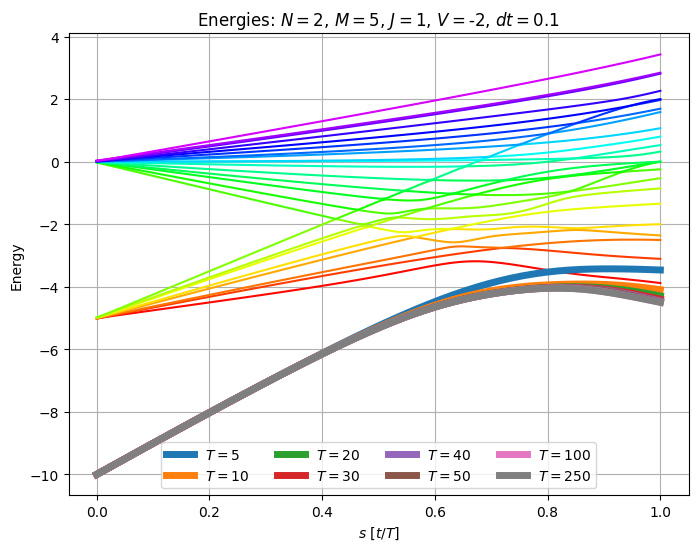

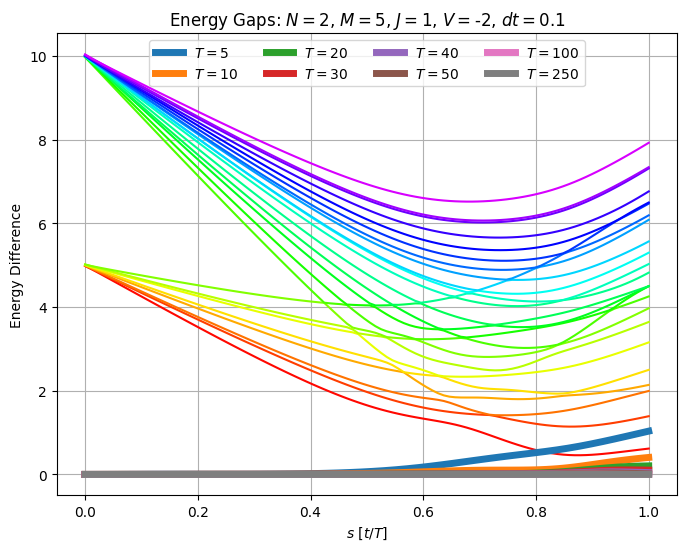

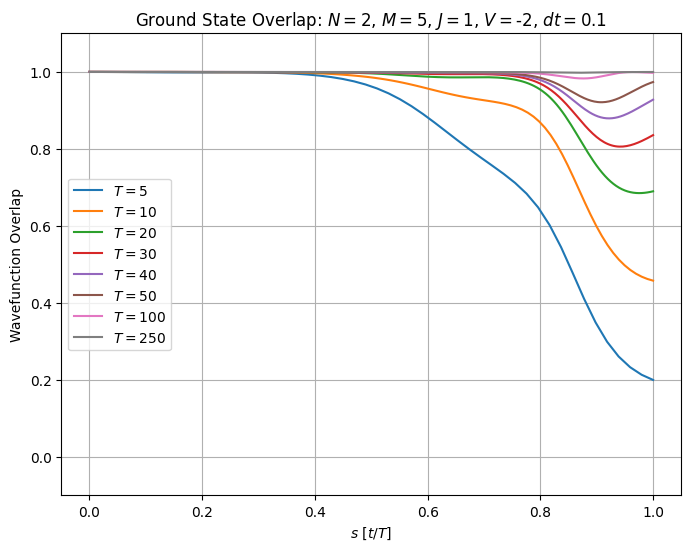

In [2]:
N = 2
M = 5

mu = 5
init_J = 0.01
init_V = 0.01

J = 1
V = -2

total_times = [5, 10, 20, 30, 40, 50, 100, 250]
total_times = [int(t) for t in total_times]
dt = 0.1

n_excited_states = M**N

cmap = plt.get_cmap("gist_rainbow")
colors = [cmap(i / (n_excited_states + 1)) for i in range(n_excited_states + 1)]

fig, ax = plt.subplots(figsize=(8, 6))
fig2, ax2 = plt.subplots(figsize = (8,6))
fig3, ax3 = plt.subplots(figsize = (8,6))

_, _, _, _, true_energies, energy_gaps, times = calculate_adiabatic_properties(N, M, mu, init_J, init_V, J, V, 1, dt=0.01)   

for i in range(n_excited_states):
    ax.plot(times, true_energies[:, i], color=colors[i])
    
for i in range(n_excited_states):
    ax2.plot(times, energy_gaps[:, i], color=colors[i])

for t_total in total_times:
    adiabatic_energies, adiabatic_diff, adiabatic_wavefunctions, overlaps_all_states, true_energies, energy_gaps, times = calculate_adiabatic_properties(N, M, mu, init_J, init_V, J, V, t_total, dt)   
    ax.plot(times/t_total, adiabatic_energies, linestyle="-", linewidth = 5, label=f"$T=${t_total}")
    ax2.plot(times/t_total, adiabatic_diff, linestyle="-", linewidth = 5, label=f"$T=${t_total}")
    ax3.plot(times/t_total, overlaps_all_states[:, 0], linestyle="-", label=f"$T=${t_total}")
    
ax.set_title(f"Energies: $N=${N}, $M=${M}, $J = ${J}, $V = ${V}, $dt=${np.round(dt, 3)}")
ax.set_xlabel("$s$ [$t/T$]")
ax.set_ylabel("Energy")
ax.legend(loc="lower center", ncols = len(total_times)//2)
ax.grid(True)

ax2.set_title(f"Energy Gaps: $N=${N}, $M=${M}, $J = ${J}, $V = ${V}, $dt=${np.round(dt, 3)}")
ax2.set_xlabel("$s$ [$t/T$]")
ax2.set_ylabel("Energy Difference")
ax2.legend(loc="upper center", ncols = len(total_times)//2)
ax2.grid(True)

ax3.set_ylim(-0.1,1.1)
ax3.set_title(f"Ground State Overlap: $N=${N}, $M=${M}, $J = ${J}, $V = ${V}, $dt=${np.round(dt, 3)}")
ax3.set_xlabel("$s$ [$t/T$]")
ax3.set_ylabel("Wavefunction Overlap")
ax3.legend(loc="center left")
ax3.grid(True)

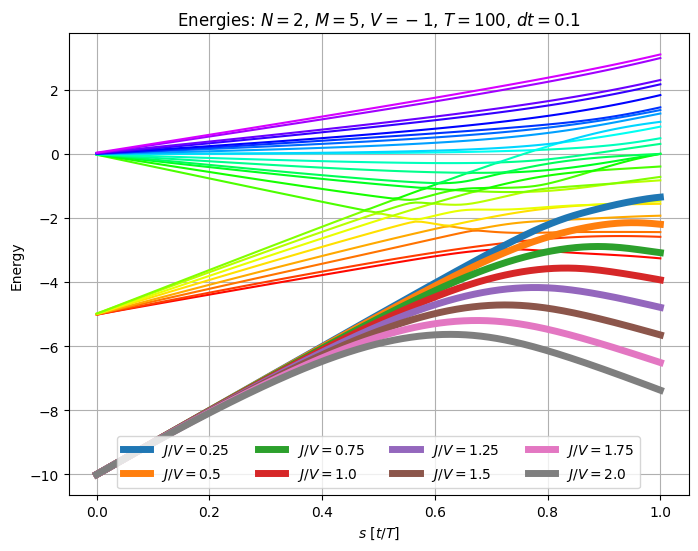

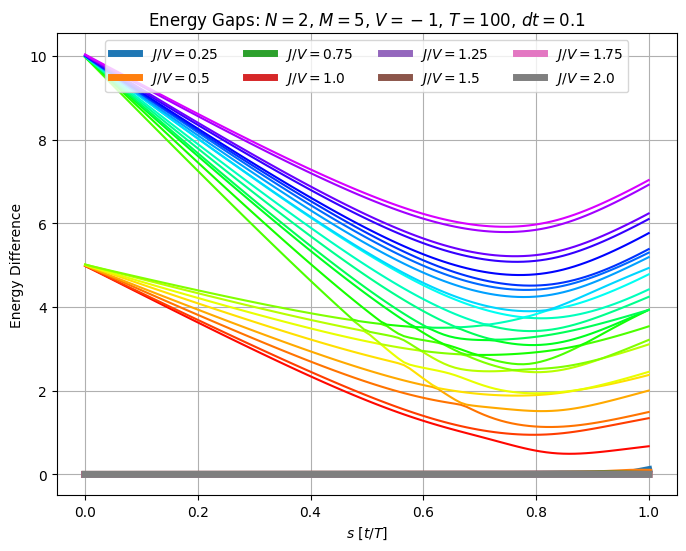

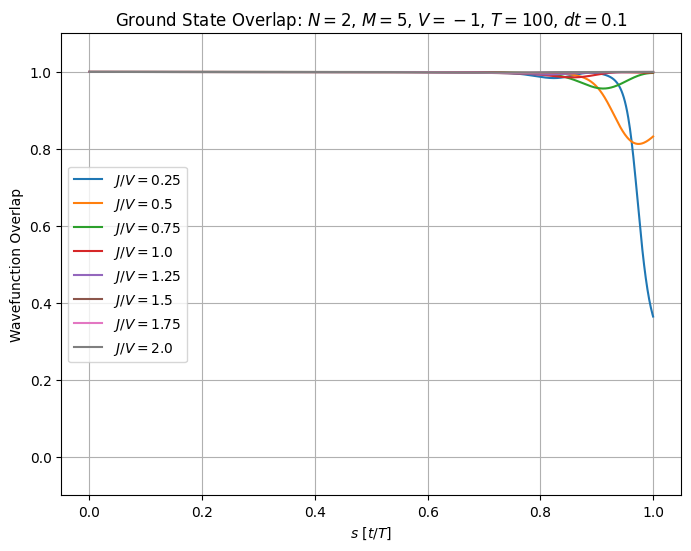

In [3]:
N = 2
M = 5

mu = 5
init_J = 0.01
init_V = 0.01

V = -1
T = 100
dt = 0.1

n_excited_states = M**N

cmap = plt.get_cmap("gist_rainbow")
colors = [cmap(i / (n_excited_states + 1)) for i in range(n_excited_states + 1)]

fig, ax = plt.subplots(figsize=(8, 6))
fig2, ax2 = plt.subplots(figsize=(8, 6))
fig3, ax3 = plt.subplots(figsize=(8, 6))

_, _, _, _, true_energies, energy_gaps, times = calculate_adiabatic_properties(N, M, mu, init_J, init_V, J, V, 1, dt=0.01)

for i in range(n_excited_states):
    ax.plot(times, true_energies[:, i], color=colors[i])

for i in range(n_excited_states):
    ax2.plot(times, energy_gaps[:, i], color=colors[i])

J_over_V_ratios = np.arange(0.25, 2.25, 0.25)
for ratio in J_over_V_ratios:
    J = ratio * V
    adiabatic_energies, adiabatic_diff, adiabatic_wavefunctions, overlaps_all_states, true_energies, energy_gaps, times = calculate_adiabatic_properties(N, M, mu, init_J, init_V, J, V, T, dt)   
    ax.plot(times/T, adiabatic_energies, linestyle="-", linewidth=5, label=f"$J/V={ratio}$")
    ax2.plot(times/T, adiabatic_diff, linestyle="-", linewidth=5, label=f"$J/V={ratio}$")
    ax3.plot(times/T, overlaps_all_states[:, 0], linestyle="-", label=f"$J/V={ratio}$")

ax.set_title(f"Energies: $N={N}$, $M={M}$, $V={V}$, $T={T}$, $dt={np.round(dt, 3)}$")
ax.set_xlabel("$s$ [$t/T$]")
ax.set_ylabel("Energy")
ax.legend(loc="lower center", ncols=len(J_over_V_ratios) // 2)
ax.grid(True)

ax2.set_title(f"Energy Gaps: $N={N}$, $M={M}$, $V={V}$, $T={T}$, $dt={np.round(dt, 3)}$")
ax2.set_xlabel("$s$ [$t/T$]")
ax2.set_ylabel("Energy Difference")
ax2.legend(loc="upper center", ncols=len(J_over_V_ratios) // 2)
ax2.grid(True)

ax3.set_ylim(-0.1, 1.1)
ax3.set_title(f"Ground State Overlap: $N={N}$, $M={M}$, $V={V}$, $T={T}$, $dt={np.round(dt, 3)}$")
ax3.set_xlabel("$s$ [$t/T$]")
ax3.set_ylabel("Wavefunction Overlap")
ax3.legend(loc="center left")
ax3.grid(True)

plt.show()